In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout

In [2]:
df=pd.read_csv("TSLA.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
1,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
2,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500
3,2010-07-07,3.280,3.326,2.996,3.160,3.160,34608500
4,2010-07-08,3.228,3.504,3.114,3.492,3.492,38557000


In [3]:
df.shape

(2392, 7)

In [4]:
df = df['Open'].values
df = df.reshape(-1, 1)


In [6]:
dataset_train = np.array(df[:int(df.shape[0]*0.8)])
dataset_test = np.array(df[int(df.shape[0]*0.8):])

In [8]:
scaler = MinMaxScaler(feature_range=(0,1))
dataset_train = scaler.fit_transform(dataset_train)
dataset_test = scaler.transform(dataset_test)

In [9]:
def create_dataset(df):
    x = []
    y = []
    for i in range(50, df.shape[0]):
        x.append(df[i-50:i, 0])
        y.append(df[i, 0])
    x = np.array(x)
    y = np.array(y)
    return x,y

In [10]:
x_train, y_train = create_dataset(dataset_train)
x_test, y_test = create_dataset(dataset_test)

In [11]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [12]:
model = Sequential()
model.add(LSTM(units=96, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [13]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [14]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [15]:
model.fit(x_train, y_train, epochs=50, batch_size=32)
model.save('stock_prediction.h5')

Epoch 1/50
59/59 [==============================] - 15s 136ms/step - loss: 0.0275
Epoch 2/50
59/59 [==============================] - 8s 127ms/step - loss: 0.0038
Epoch 3/50
59/59 [==============================] - 8s 137ms/step - loss: 0.0037 1s -
Epoch 4/50
59/59 [==============================] - 8s 134ms/step - loss: 0.0032
Epoch 5/50
59/59 [==============================] - 8s 128ms/step - loss: 0.0028
Epoch 6/50
59/59 [==============================] - 8s 127ms/step - loss: 0.0030
Epoch 7/50
59/59 [==============================] - 8s 128ms/step - loss: 0.0028
Epoch 8/50
59/59 [==============================] - 8s 128ms/step - loss: 0.0028
Epoch 9/50
59/59 [==============================] - 8s 128ms/step - loss: 0.0025
Epoch 10/50
59/59 [==============================] - 8s 127ms/step - loss: 0.0023
Epoch 11/50
59/59 [==============================] - 8s 127ms/step - loss: 0.0023
Epoch 12/50
59/59 [==============================] - 8s 127ms/step - loss: 0.0020
Epoch 13/50
59/59 [

In [16]:
model = load_model('stock_prediction.h5')

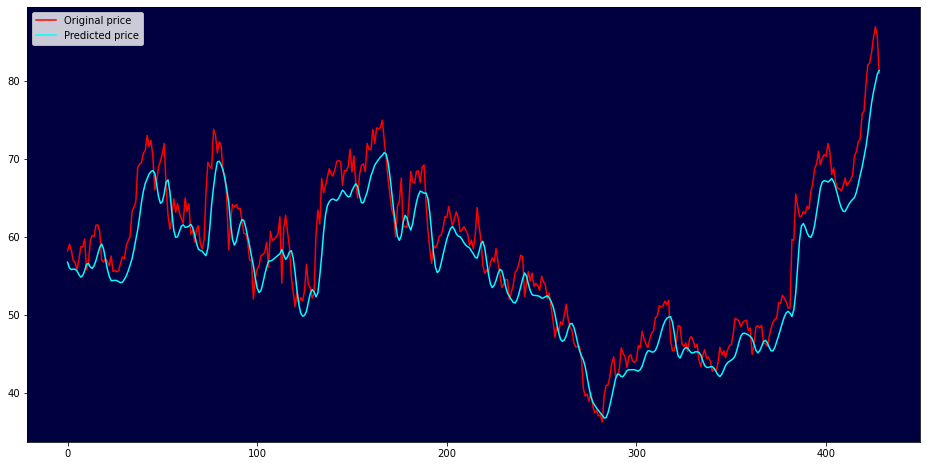

In [17]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

fig, ax = plt.subplots(figsize=(16,8))
ax.set_facecolor('#000041')
ax.plot(y_test_scaled, color='red', label='Original price')
plt.plot(predictions, color='cyan', label='Predicted price')
plt.legend()